In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv("/content/drive/MyDrive/Pizzario_Customer_Segmentation/pizza_customers.csv")

In [14]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
data.shape

(200, 5)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
# Checking Null Values

data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### **Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

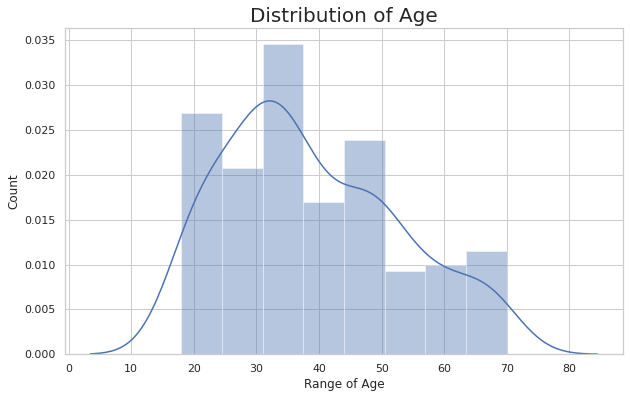

In [19]:
#Distribution of Age


plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

***There are customers of a wide variety of ages.***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

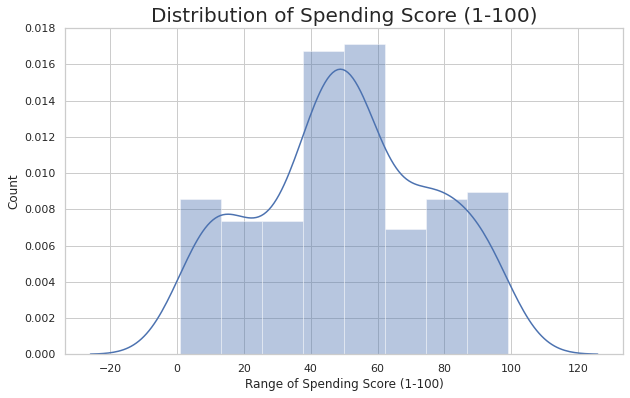

In [20]:
# Distribution of spending score

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

***The maximum spending score is in the range of 40 to 60.***

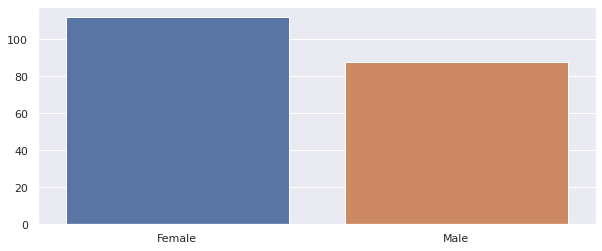

In [21]:
# Gender Analysis

genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

***There are more female customers than male.***

### **Clustering based on 2 features**
***First, we work with two features only, annual income and spending score.***

In [22]:
# We take just the Annual Income and Spending score
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [23]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


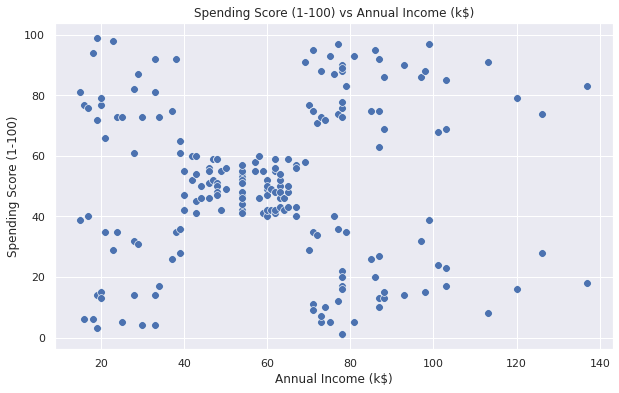

In [24]:
#Scatterplot of the Annual Income (k$) & Spending Score (1-100)

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

***The data does seem to hold some patterns.***

### ***Data Transformation***

In [25]:
# Standardizing the data so that each value should be on the same scale and clusters will not get strecthed.

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

## **Custom Implementation for K-Means Clustering for Customer Segmantation**



In [26]:
n_samples=200
centers=5
n_features=2
random_state=20

### Helper Functions for K-Means

#### **These helper functions includes the steps which need to follow in order to build the successful model.**

1. Select K points as the initial centroids.
2. **repeat**
3. From K clusters by assigning all points to the closest centroids.
4. Recompute the centroids for each cluster.
5. **until** The centroid don't change.

In [27]:
## Initializing K centroids

def init_centroids(k, X):
    arr = []
    for i in range(k):
        cx1 = np.random.uniform(min(X[:,0]), max(X[:,0]))
        cx2 = np.random.uniform(min(X[:,1]), max(X[:,1]))
        arr.append([cx1, cx2])
    return np.asarray(arr)

In [28]:
def dist(a, b):
    return np.sqrt(sum(np.square(a-b)))

In [29]:
## Assigning all points to the nearest centroid.

def assign_cluster(k, X, cg):
    cluster = [-1]*len(X)
    for i in range(len(X)):
        dist_arr = []
        for j in range(k):
            dist_arr.append(dist(X[i], cg[j]))
        idx = np.argmin(dist_arr)
        cluster[i] = idx
    return np.asarray(cluster)

In [31]:
## Recompute the centroids 

def compute_centroids(k, X, cluster):
    cg_arr = []
    for i in range(k):
        arr = []
        for j in range(len(X)):
            if cluster[j]==i:
                arr.append(X[j])
        cg_arr.append(np.mean(arr, axis=0))
    return np.asarray(cg_arr)

In [32]:
def measure_change(cg_prev, cg_new):
    res = 0
    for a,b in zip(cg_prev,cg_new):
        res+=dist(a,b)
    return res

In [33]:
def k_means(k, X):
    cg_prev = init_centroids(k, X)
    cluster = [0]*len(X)
    cg_change = 100
    while cg_change>.001:
        cluster = assign_cluster(k, X, cg_prev)
        #show_clusters(X, cluster, cg_prev)
        cg_new = compute_centroids(k, X, cluster)
        cg_change = measure_change(cg_new, cg_prev)
        cg_prev = cg_new
    return cluster

cluster = k_means(5, X)

In [34]:
cen = compute_centroids(5, X, cluster)
cen

array([[ 2.06703817,  1.0958772 ],
       [ 0.75632724,  1.27092084],
       [-1.32954532,  1.13217788],
       [-0.47298347, -0.26414036],
       [ 1.00919971, -1.22553537]])

In [35]:
cluster

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

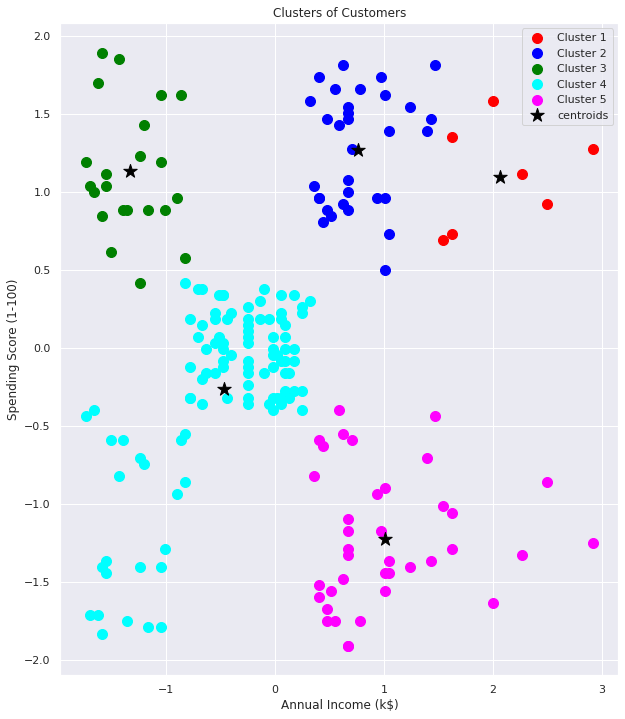

In [40]:
# Visualizing the Cluster

plt.figure(figsize=(10, 12))

plt.scatter(X[cluster == 0, 0], X[cluster == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[cluster == 1, 0], X[cluster == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[cluster == 2, 0], X[cluster == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[cluster == 3, 0], X[cluster == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[cluster == 4, 0], X[cluster == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(cen[:, 0], cen[:, 1], s = 200, c = 'black', marker = '*', label = 'centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

***We can clearly see that 5 different clusters have been formed from the data.***

In [41]:
#adding the labels to a column named label
df1["label"] = cluster
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3


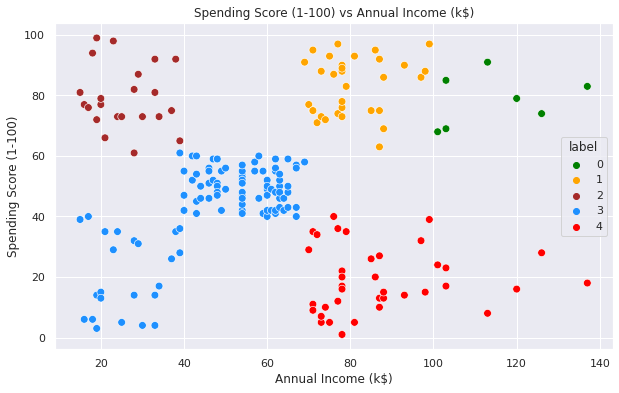

In [42]:
#Scatterplot of the clusters

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


### **Cluster Nomenclature**

 
#### label 0: (Green Color) -> Earning high and also Spending high [TARGET CUTOMERS]
#### label 1: (Yellow Color) -> Earning average but Spending high
#### label 2: (Brown Color) -> Earning less but Spending more
#### label 3: (Dodgerblue Color) -> Average in terms of Earning and Spending 
#### label 4: (Red Color) -> Earning high but Spending less

### **Recommendation as Analyst**

***We can give offers to those customers who have high income but not visiting too much, we can try to give discounts or some membership cards, so that these customers can also visits regularly. One more thing restaurant can do they can provide some membership cards or special treats to their "TARGET" who's Earning and Spending both are high.***
***So, these are some offers which restaurant will introduce in order to raise the profit of restaurant. This is how restaurant make improvements and get some more profits.***